In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

----
# Read Data

In [2]:
path = os.getenv('HOME') + '/Desktop/onemonth.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1,Origin_Zone,Destination_Zone,Start_Date,End_Date,Aggregation,Subscriber_Class,Purpose,Time_of_Day,Count,Zone2Zone,SameZone,Start_DateTime,Signal
0,353303,889823,889823,889823,632,1188,20140406,20140406,Sun,Resident Worker,OH,H00:H01,20.53,1,False,2014-04-06 00:00:00,True
1,353304,889824,889824,889824,807,781,20140406,20140406,Sun,Resident Worker,OH,H00:H01,24.13,1,False,2014-04-06 00:00:00,True
2,353305,889825,889825,889825,717,424,20140406,20140406,Sun,Resident Worker,OH,H03:H04,72.48,1,False,2014-04-06 03:00:00,True
3,353306,889844,889844,889844,952,1133,20140406,20140406,Sun,Resident Worker,OH,H00:H01,48.73,1,False,2014-04-06 00:00:00,True
4,353307,889855,889855,889855,773,635,20140406,20140406,Sun,Resident Worker,OH,H01:H02,38.71,1,False,2014-04-06 01:00:00,True


In [3]:
df1 = data[((data.Subscriber_Class=='Short Term Visitor') | (data.Subscriber_Class=='Long Term Visitor')) & \
      ((data.Origin_Zone==902) | (data.Destination_Zone==902))]

In [4]:
df2 = df1[((df1.Destination_Zone < 4000) & (df1.Origin_Zone < 4000))]

In [5]:
for i,c in enumerate(df2.columns):
    print(" {:2} : {}".format(i,c))

  0 : Unnamed: 0
  1 : Unnamed: 0.1
  2 : Unnamed: 0.1.1
  3 : Unnamed: 0.1.1
  4 : Origin_Zone
  5 : Destination_Zone
  6 : Start_Date
  7 : End_Date
  8 : Aggregation
  9 : Subscriber_Class
 10 : Purpose
 11 : Time_of_Day
 12 : Count
 13 : Zone2Zone
 14 : SameZone
 15 : Start_DateTime
 16 : Signal


In [6]:
df = df2.iloc[:,[4,5,6,7,8,9,11,12,15]].reset_index(drop=True)
df.head()

,Origin_Zone,Destination_Zone,Start_Date,End_Date,Aggregation,Subscriber_Class,Time_of_Day,Count,Start_DateTime
0,902,788,20140406,20140406,Sun,Short Term Visitor,H00:H01,18.19,2014-04-06 00:00:00
1,902,900,20140406,20140406,Sun,Short Term Visitor,H07:H08,39.19,2014-04-06 07:00:00
2,906,902,20140406,20140406,Sun,Short Term Visitor,H16:H17,39.19,2014-04-06 16:00:00
3,916,902,20140406,20140406,Sun,Short Term Visitor,H20:H21,14.62,2014-04-06 20:00:00
4,1107,902,20140406,20140406,Sun,Short Term Visitor,H09:H10,38.47,2014-04-06 09:00:00


In [7]:
len(df)

32714

In [8]:
df.Start_DateTime = pd.to_datetime(df.Start_DateTime)

---
# Time Series

In [9]:
dfplot1 = df.groupby(['Subscriber_Class', 'Start_DateTime']).sum()['Count'].to_frame().reset_index(level=[0])
dfplot1_LS = df.groupby(['Start_DateTime']).sum()['Count'].to_frame().reset_index(level=[0])

In [10]:
dfplot1_L = dfplot1.loc[dfplot1.Subscriber_Class == 'Long Term Visitor', ['Count']]
dfplot1_S = dfplot1.loc[dfplot1.Subscriber_Class == 'Short Term Visitor', ['Count']]

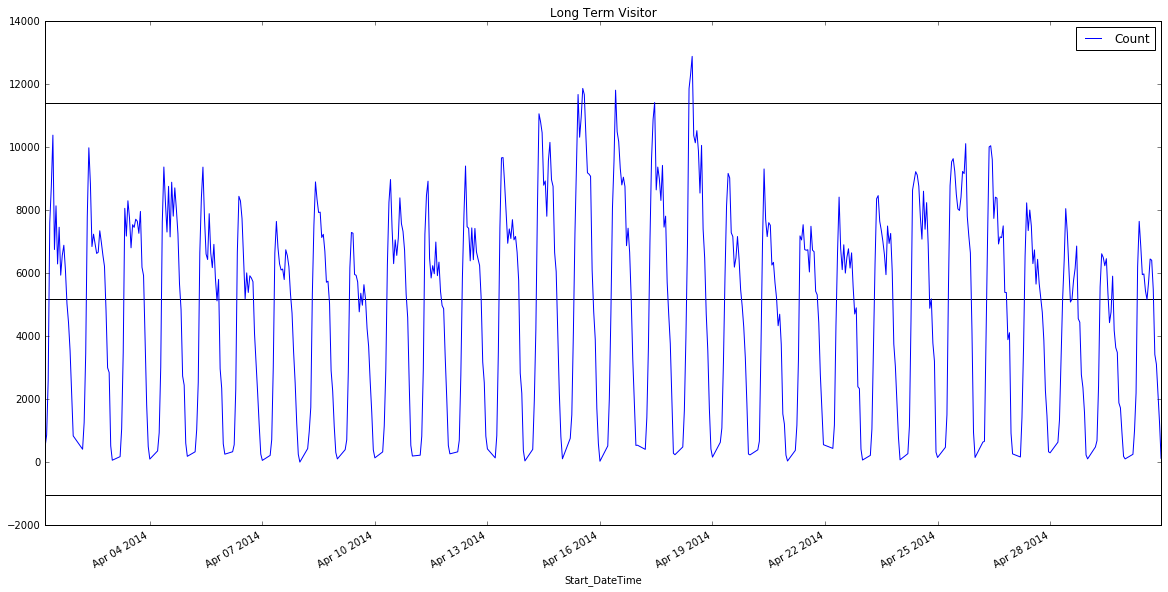

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
dfplot1_L.plot(ax=ax, title='Long Term Visitor')
ax.hlines(np.mean(dfplot1_L.Count), ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(np.mean(dfplot1_L.Count) + 2*np.std(dfplot1_L.Count), ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(np.mean(dfplot1_L.Count) - 2*np.std(dfplot1_L.Count), ax.get_xlim()[0], ax.get_xlim()[1])

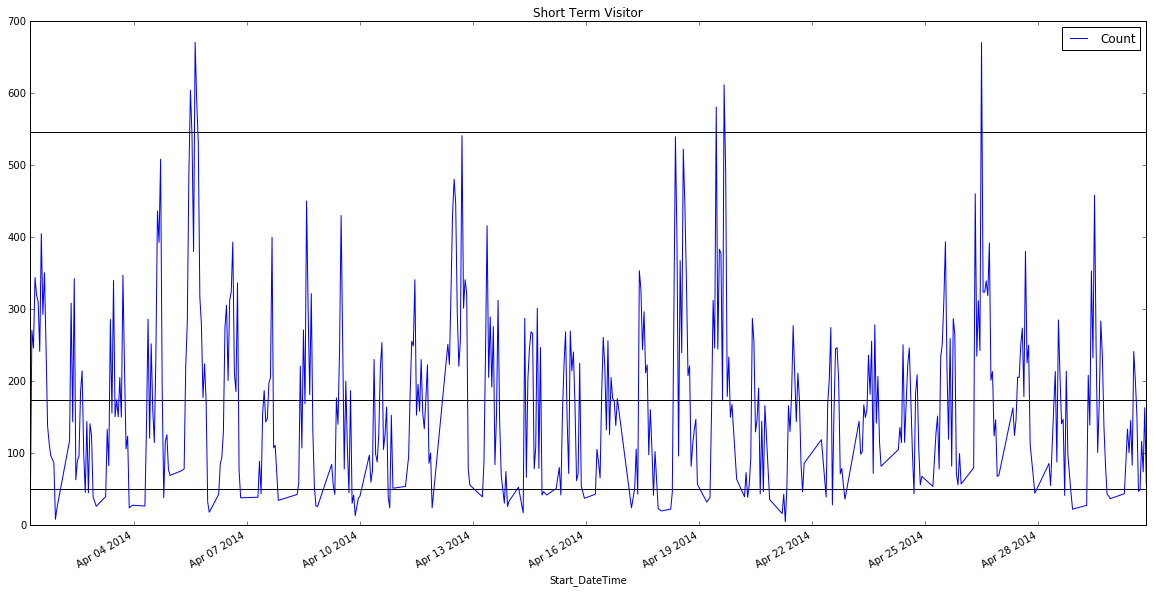

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
dfplot1_S.plot(ax=ax, title='Short Term Visitor')
ax.hlines(np.mean(dfplot1_S.Count), ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(np.mean(dfplot1_S.Count) + 3*np.std(dfplot1_S.Count), ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(np.mean(dfplot1_S.Count) - np.std(dfplot1_S.Count), ax.get_xlim()[0], ax.get_xlim()[1])